In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
#загрузим данные, используя id бросков как индекс
data = pd.read_csv('Kobe.csv')
data.set_index('shot_id', inplace=True)
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
2,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
3,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
4,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
5,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR


In [3]:
#оценим наличие пропусков в данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30697 entries, 1 to 30697
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [4]:
data.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09


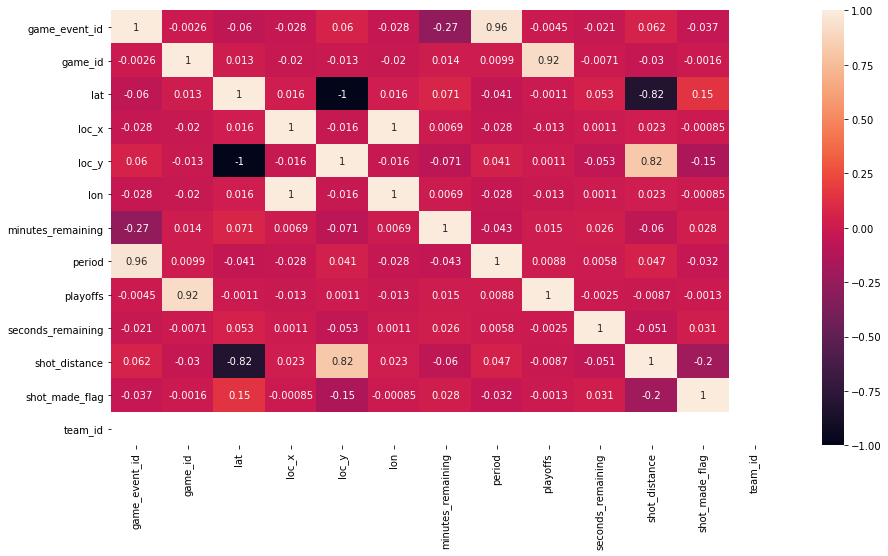

In [5]:
#посмотрим корреляцию признаков
corr = data.corr()
plt.figure(figsize=[15,8])
sns.heatmap(corr, annot=True)

In [6]:
#удалим столбцы с максимальной корреляцией, а так же те, которые не будем использовать при построении модели

cols_to_drop = ['game_id', 'game_event_id', 'lat', 'lon', 'team_id', 'team_name', 'matchup']

data = data.drop(cols_to_drop, axis=1)

In [7]:
data.head()

,action_type,combined_shot_type,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,opponent
shot_id,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,167,72,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,POR
2,Jump Shot,Jump Shot,-157,0,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,POR
3,Jump Shot,Jump Shot,-101,135,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,POR
4,Jump Shot,Jump Shot,138,175,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,POR
5,Driving Dunk Shot,Dunk,0,0,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,POR


In [8]:
#объединим столбцы с секундами и минутами
data['time_remainig'] = data['minutes_remaining'] * 60 + data['seconds_remaining']
data = data.drop(['minutes_remaining', 'seconds_remaining'], axis=1)
data.head()

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,opponent,time_remainig
shot_id,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,167,72,1,0,2000-01,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,POR,627
2,Jump Shot,Jump Shot,-157,0,1,0,2000-01,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,POR,622
3,Jump Shot,Jump Shot,-101,135,1,0,2000-01,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,POR,465
4,Jump Shot,Jump Shot,138,175,1,0,2000-01,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,POR,412
5,Driving Dunk Shot,Dunk,0,0,2,0,2000-01,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,POR,379


In [9]:
#преобразуем дату игры 

data['game_date'] = pd.to_datetime(data['game_date'])
data['days_since'] = (pd.to_datetime(data['game_date'].max()) - pd.to_datetime(data['game_date'])).dt.days
data = data.drop(['game_date'], axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30697 entries, 1 to 30697
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   loc_x               30697 non-null  int64  
 3   loc_y               30697 non-null  int64  
 4   period              30697 non-null  int64  
 5   playoffs            30697 non-null  int64  
 6   season              30697 non-null  object 
 7   shot_distance       30697 non-null  int64  
 8   shot_made_flag      25697 non-null  float64
 9   shot_type           30697 non-null  object 
 10  shot_zone_area      30697 non-null  object 
 11  shot_zone_basic     30697 non-null  object 
 12  shot_zone_range     30697 non-null  object 
 13  opponent            30697 non-null  object 
 14  time_remainig       30697 non-null  int64  
 15  days_since          30697 non-null  int64  
dtypes: f

In [11]:
#отделим тестовый датасет
data_test = data.loc[data['shot_made_flag'].isnull(), :]
data.dropna(inplace=True)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 30694
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         5000 non-null   object 
 1   combined_shot_type  5000 non-null   object 
 2   loc_x               5000 non-null   int64  
 3   loc_y               5000 non-null   int64  
 4   period              5000 non-null   int64  
 5   playoffs            5000 non-null   int64  
 6   season              5000 non-null   object 
 7   shot_distance       5000 non-null   int64  
 8   shot_made_flag      0 non-null      float64
 9   shot_type           5000 non-null   object 
 10  shot_zone_area      5000 non-null   object 
 11  shot_zone_basic     5000 non-null   object 
 12  shot_zone_range     5000 non-null   object 
 13  opponent            5000 non-null   object 
 14  time_remainig       5000 non-null   int64  
 15  days_since          5000 non-null   int64  
dtypes: fl

In [12]:
#преобразуем категориальные данные
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

col_to_transform = ['action_type', 'combined_shot_type', 'season', 'shot_made_flag', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'opponent']

for col in col_to_transform:
    data[col] = le.fit_transform(data[col])

In [16]:
# задаем Х и Y
X = data.iloc[:, data.columns != 'shot_made_flag']
y = data['shot_made_flag']
X

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,time_remainig,days_since
shot_id,,,,,,,,,,,,,,,
2,25,3,-157,0,1,0,4,15,0,3,4,2,25,622,5643
3,25,3,-101,135,1,0,4,16,0,2,4,0,25,465,5643
4,25,3,138,175,1,0,4,22,0,4,4,0,25,412,5643
5,4,1,0,0,2,0,4,0,0,1,5,4,25,379,5643
6,25,3,-145,-11,3,0,4,14,0,3,4,2,25,572,5643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,11,4,0,0,4,1,3,0,0,1,5,4,11,424,5777
30693,25,3,1,48,4,1,3,4,0,1,2,4,11,365,5777
30695,40,3,-134,166,4,1,3,21,0,2,4,0,11,208,5777


In [17]:
# отбираем максимально значимые признаки

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X, y)
imp = pd.Series(rf.feature_importances_)
imp.sort_values(ascending=False)

13    0.192178
14    0.164604
0     0.133431
2     0.121561
3     0.113706
12    0.108826
7     0.052524
4     0.041122
6     0.028292
5     0.012519
1     0.010237
9     0.009094
11    0.005395
10    0.005188
8     0.001323
dtype: float64

In [21]:
#отбираем те признаки, значимость которых более 0,05
X1 = data.iloc[:, [13, 14, 0, 2, 3, 12, 7]]

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_train1)
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = 1)

In [28]:
results = pd.DataFrame()
type(results)

pandas.core.frame.DataFrame

In [64]:
from sklearn.linear_model import RidgeClassifier
rcl = RidgeClassifier()
rcl.fit(X_train, y_train)
predictions1 = rcl.predict(X_test)
Ridge_coeff = np.around(rcl.coef_, decimals= 5).tolist() 
results['Ridge'] = Ridge_coeff[0]

In [67]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions1 = lr.predict(X_test)
Linear_coeff = np.around(lr.coef_, decimals= 5).tolist() 
results['Linear'] = Linear_coeff[0]

In [68]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train, y_train)
predictions2 = ls.predict(X_test)
Lasso_coeff = np.around(ls.coef_, decimals= 5).tolist() 
results['Lasso'] = Lasso_coeff[0]

In [69]:
results

,Ridge,Linear,Lasso
0,0.00080,0.0004,0.0
1,0.00010,0.0004,0.0
2,0.00180,0.0004,0.0
3,0.00010,0.0004,0.0
4,0.00047,0.0004,0.0
5,-0.01488,0.0004,0.0
6,-0.02656,0.0004,0.0


In [58]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr, tpr, thres = roc_curve(y_test, predictions)
fpr1, tpr1, thres1 = roc_curve(y_test, predictions1)
fpr2, tpr2, thres2 = roc_curve(y_test, predictions2)

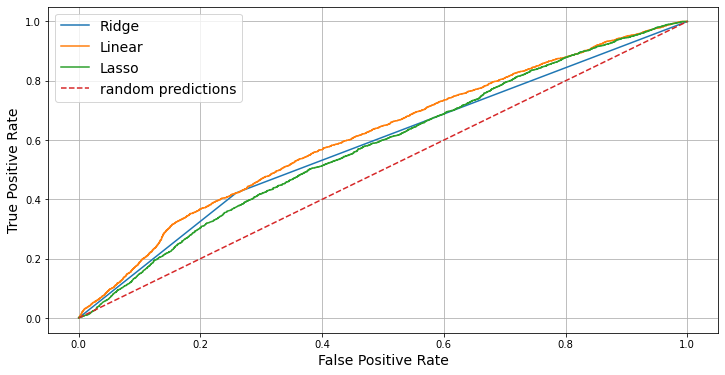

AUC score for Ridge is 0.58
AUC score for Linear is 0.61
AUC score for Lasso is 0.58


In [61]:
plt.figure(figsize=(12,6))
plt.grid()
plt.plot( fpr, tpr, label = 'Ridge' )
plt.plot( fpr1, tpr1, label = 'Linear')
plt.plot( fpr2, tpr2, label = 'Lasso')
plt.plot(np.linspace(0,1,100), 
         np.linspace(0,1,100), 
         linestyle='--', 
         label='random predictions')

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)

plt.legend(fontsize=14 )
plt.show()

print("AUC score for Ridge is %.2f"%auc(fpr,tpr))
print("AUC score for Linear is %.2f"%auc(fpr1,tpr1))
print("AUC score for Lasso is %.2f"%auc(fpr2,tpr2))


In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 'mle')
pca.fit(scaled_X)
print(pca.explained_variance_ratio_)

[0.36020782 0.14634063 0.1439389  0.14272397 0.13748163 0.0551536 ]
